<a href="https://colab.research.google.com/github/T-art-coder/TidyTuesday-Weekly/blob/main/TidyTuesday_W31_Frogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download packages

In [ ]:
#install.packages("caret")
#install.packages("gridExtra")
#install.packages("lubridate")
#install.packages("skimr")
#install.packages("tidyverse")
#install.packages("GGally")
#install.packages("scales")
library(caret)
library(gridExtra)
library(skimr)
library(tidyverse)
library(lubridate)
library(GGally)
library(scales)

In [ ]:
#install.packages("showtext")
library(showtext)

In [ ]:
install.packages("tidytuesdayR")
tuesdata <- tidytuesdayR::tt_load(2022, week = 31)

In [ ]:
frog <- tuesdata$frogs

In [ ]:
## Loading Google fonts (https://fonts.google.com/)
font_add_google("Gochi Hand", "gochi")
font_add_google("Schoolbell", "bell")

## Automatically use showtext to render text
showtext_auto()

### Code

In [ ]:
head(frog)

Site,Subsite,HabType,SurveyDate,Ordinal,Frequency,UTME_83,UTMN_83,Interval,Female,Water,Type,Structure,Substrate,Beaver,Detection,Female_ch
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
Crane Prairie,SE Pond,Pond,2018-09-25,268,164.169,597369,4846486,0,0,Deep water,Marsh/Pond,Herbaceous veg,Unknown substrate,No beaver,Captured,Male
Crane Prairie,SE Pond,Pond,2018-10-02,275,164.169,597352,4846487,1,0,Deep water,Marsh/Pond,Open,Unknown substrate,No beaver,No visual,Male
Crane Prairie,SE Pond,Pond,2018-10-09,282,164.169,597345,4846458,2,0,Shallow water,Marsh/Pond,Herbaceous veg,Unknown substrate,No beaver,No visual,Male
Crane Prairie,SE Pond,Pond,2018-10-15,288,164.169,597340,4846464,3,0,Deep water,Marsh/Pond,Woody debris,Unknown substrate,No beaver,No visual,Male
Crane Prairie,SE Pond,Pond,2018-10-22,295,164.169,597344,4846460,4,0,Deep water,Marsh/Pond,Woody veg,Unknown substrate,No beaver,No visual,Male
Crane Prairie,SE Pond,Pond,2018-11-01,305,164.169,597410,4846451,5,0,Deep water,Marsh/Pond,Herbaceous veg,Unknown substrate,No beaver,No visual,Male


### Some data wrangling

In [ ]:
frog$Female_ch <- as.factor(frog$Female)
frog$SurveyDate <- as.Date(mdy(frog$SurveyDate))

In [ ]:
levels(frog$Female_ch) <- list(Male = "0", 
                                Female = "1")
frog$Female_ch 

### Exploring data

In [ ]:
sample_cat_features <- c("Site", "Subsite", "HabType", "Water", "Type", "Structure", "Substrate", "Beaver", "Detection", "Female_ch")

# We find a date column
# Column 'SurveyDate' has more levels (41) than the threshold (15) allowed.
# Ordinal - basically it is date

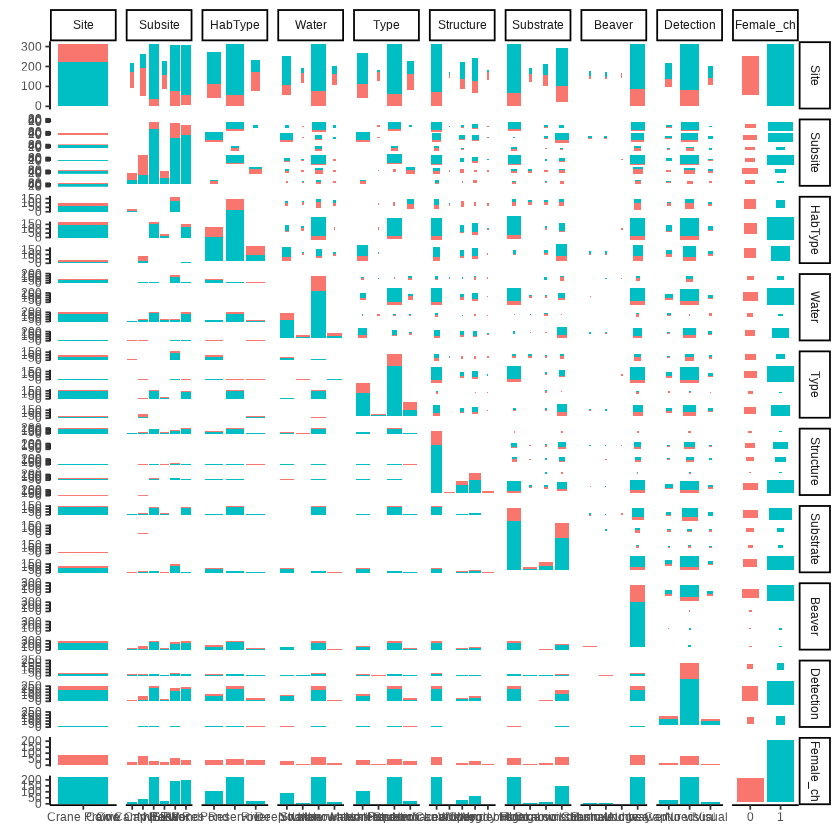

In [ ]:
ggpairs(frog, columns = c(sample_cat_features), aes(color = as.factor(Female)))+
  theme_classic()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



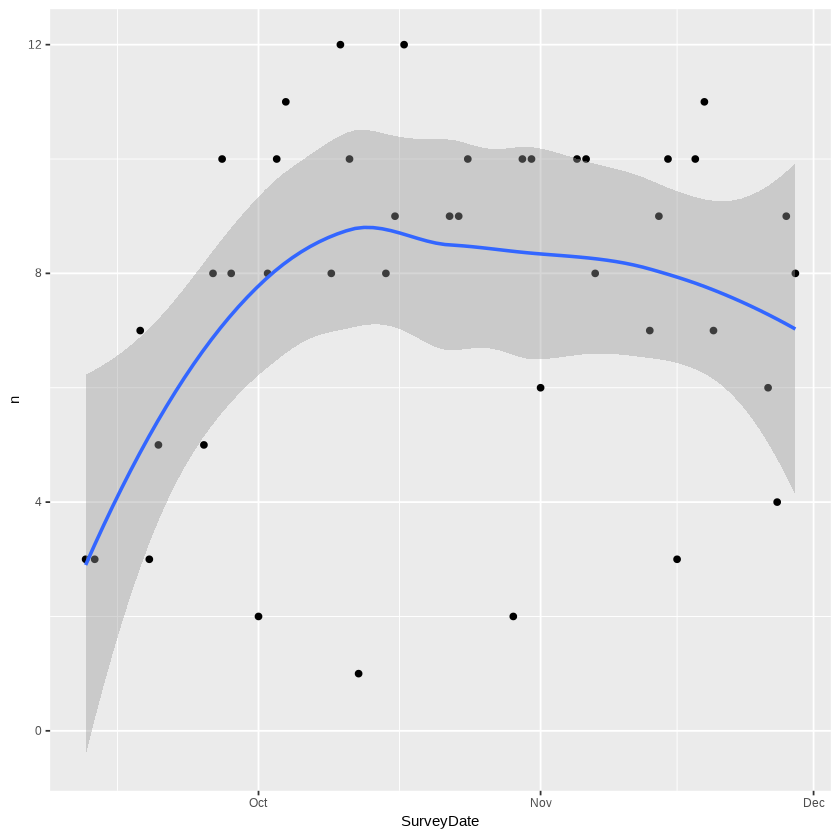

In [ ]:
frog %>% select(HabType, SurveyDate, Female) %>% arrange(SurveyDate) %>% group_by(SurveyDate) %>% summarize(n = n()) %>%
  ggplot(aes(x = SurveyDate, y = n)) +
  geom_point()+
  geom_smooth()

### Final Plot

`summarise()` has grouped output by 'SurveyDate', 'HabType'. You can override
using the `.groups` argument.
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



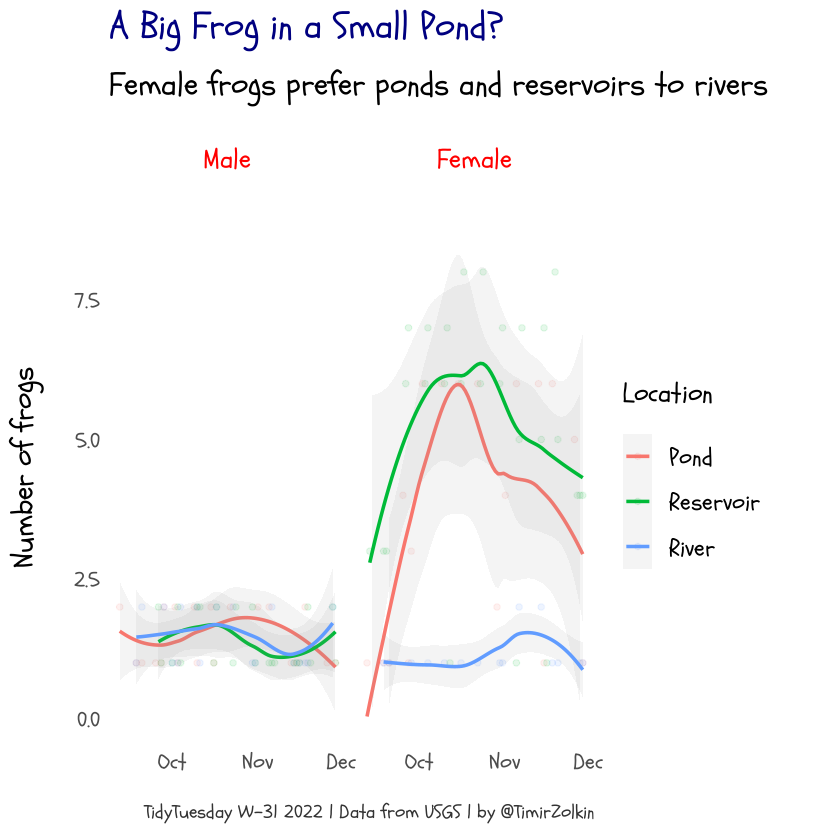

In [ ]:
frog_pic <- frog %>% select(HabType, SurveyDate, Female_ch) %>% arrange(SurveyDate) %>% group_by(SurveyDate, HabType, Female_ch) %>% summarize(n = n()) %>%
  ggplot(aes(x = SurveyDate, y = n, color = HabType)) +
  geom_point(alpha = 0.1) +
  geom_smooth(alpha = 0.1)+
  facet_wrap(~ Female_ch) +
  theme_minimal(base_family = "bell", base_size = 12)+
  theme(axis.title.y = element_text(size = rel(1.9)),
        axis.title.x = element_blank(),
        # grid subtitles
        strip.text.x = element_text(
          size = rel(2.1), color = "red", face = "bold"),
        plot.title = element_text(size = rel(2.3), color = "navyblue"),
        plot.subtitle = element_text(size = rel(2.0)),
        plot.caption = element_text(size = rel(1.2), colour = "grey20"),
        axis.text.x = element_text(size = rel(1.7)),
        axis.text.y = element_text(size = rel(1.7)),
        legend.title = element_text(size=rel(1.7)),
        legend.text = element_text(size = rel(1.5)),
        panel.grid = element_blank()
  ) +
  labs(title = "A Big Frog in a Small Pond?",
       subtitle = "Female frogs prefer ponds and reservoirs to rivers",
       caption = "TidyTuesday W-31 2022 | Data from USGS | by @TimirZolkin",
       color = "Location",
       y = "Number of frogs"
       )+
       ylim(0, 9)


frog_pic

In [ ]:
ggsave("frog_pic.png", frog_pic, height = 5, width = 7, dpi = 200)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

